## 推導 優化器: Adam, 了解其原理與優化過程

### 提供 AdamOptimizer 的範例, 可以讓學員驗證 m, v與 β的變化關係

請務必使用 conda 指令安裝

務必確認HDD 有足夠的空間

conda install -c conda-forge ffmpeg

NOTE: 必須在執行此一範例前先行安裝

In [1]:
pip install autograd

  Created wheel for autograd: filename=autograd-1.3-py3-none-any.whl size=47994 sha256=8b682b64960878770a8f64e4004d265c99623757cf61020bed5ce69785538610
  Stored in directory: c:\users\tut\appdata\local\pip\cache\wheels\ef\32\31\0e87227cd0ca1d99ad51fbe4b54c6fa02afccf7e483d045e04
Successfully built autograd
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install IPython

Note: you may need to restart the kernel to use updated packages.


In [3]:
import sys
print(sys.version)

3.7.7 (default, May  6 2020, 11:45:54) [MSC v.1916 64 bit (AMD64)]


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import autograd.numpy as np

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from matplotlib import animation
from IPython.display import HTML

from autograd import elementwise_grad,value_and_grad,grad
from scipy.optimize import minimize
from collections import defaultdict
from itertools import zip_longest

## Objective function: the Beale function

In [5]:
# Objective function: the Beale function

f  = lambda x, y: (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

xmin, xmax, xstep = -4.5, 4.5, .2
ymin, ymax, ystep = -4.5, 4.5, .2

x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))

z = f(x, y)
minima = np.array([3., .5])
f(*minima)

0.0

In [6]:
minima_ = minima.reshape(-1, 1)
minima_

f(*minima_)

array([0.])

In [7]:
def target_func(weights):
    x,y = weights
    return f(x,y)

## Adam Optimizer

In [8]:
class Adam:
    def __init__(self, loss, weights, lr=0.001, beta1=0.9, beta2=0.999, epislon=1e-8):
        self.loss = loss
        self.theta = weights
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.epislon = epislon
        self.get_gradient = grad(loss)
        self.m = 0
        self.v = 0
        self.t = 0

    def minimize_raw(self):
        self.t += 1
        g = self.get_gradient(self.theta)
        self.m = self.beta1 * self.m + (1 - self.beta1) * g
        self.v = self.beta2 * self.v + (1 - self.beta2) * (g * g)
        self.m_hat = self.m / (1 - self.beta1 ** self.t)
        self.v_hat = self.v / (1 - self.beta2 ** self.t)
        self.theta -= self.lr * self.m_cat / (self.v_cat ** 0.5 + self.epislon)

    def minimize(self):
        self.t += 1
        g = self.get_gradient(self.theta)
        lr = self.lr * (1 - self.beta2 ** self.t) ** 0.5 / (1 - self.beta1 ** self.t)
        self.m = self.beta1 * self.m + (1 - self.beta1) * g
        self.v = self.beta2 * self.v + (1 - self.beta2) * (g * g)
        self.theta -= lr * self.m / (self.v ** 0.5 + self.epislon)

    def minimize_trace(self, path=[]):
        self.t += 1
        g = self.get_gradient(self.theta)
        lr = self.lr * (1 - self.beta2 ** self.t) ** 0.5 / (1 - self.beta1 ** self.t)
        self.m = self.beta1 * self.m + (1 - self.beta1) * g
        self.v = self.beta2 * self.v + (1 - self.beta2) * (g * g)
        self.theta -= lr * self.m / (self.v ** 0.5 + self.epislon)
        path.append(np.copy(self.theta))

In [9]:
EPOCHS = 3000
SHOW_STEPS = 100
PRECISION = 1e-8
weights = np.array([1., 1.5])
path_trace = [np.copy(weights)]
adam = Adam(target_func, weights, lr=0.01)
print("start to optimize EPOCHS:{}".format(EPOCHS))
progress_step = EPOCHS // SHOW_STEPS

for i in range(EPOCHS):
    if i % progress_step == 0:
        loss_value = adam.loss(adam.theta)
        print("times:{} weights:{} loss:{}".format(i, adam.theta, loss_value))
        if loss_value < PRECISION:
            print("loss:{} is less than precision:{}, finish!".format(loss_value, PRECISION))
            break
    adam.minimize_trace(path_trace)
print("\nfinal weights:{} loss:{}".format(adam.theta, adam.loss(adam.theta)))

start to optimize EPOCHS:3000
times:0 weights:[1.  1.5] loss:41.25
times:30 weights:[0.7371867  1.22939503] loss:20.299015115677488
times:60 weights:[0.60591868 1.04849877] loss:15.060862617226
times:90 weights:[0.58632034 0.91842752] loss:12.981397656153064
times:120 weights:[0.6502342  0.80472928] loss:11.321903656324578
times:150 weights:[0.78098643 0.69414189] loss:9.42760928272687
times:180 weights:[0.95890658 0.58512322] loss:7.2900861448751595
times:210 weights:[1.15977446 0.48274852] loss:5.207435732865861
times:240 weights:[1.36076875 0.39347367] loss:3.479710603481422
times:270 weights:[1.54570617 0.32136353] loss:2.228035884986305
times:300 weights:[1.70612102 0.26732981] loss:1.411090259141672
times:330 weights:[1.83962001 0.23008581] loss:0.9173472485588398
times:360 weights:[1.94767077 0.2072466 ] loss:0.6334829645634958
times:390 weights:[2.03377945 0.19605415] loss:0.47280443927631366
times:420 weights:[2.10220386 0.19378707] loss:0.3789137443501675
times:450 weights:[2

In [10]:
print("-------------")
path_trace = np.array(path_trace).T
shape = path_trace.shape
if shape[1] > SHOW_STEPS:
    show_step = shape[1] // SHOW_STEPS
    path_trace = np.array(path_trace[:,::show_step])
print(path_trace)

-------------
[[1.         0.7371867  0.60591868 0.58632034 0.6502342  0.78098643
  0.95890658 1.15977446 1.36076875 1.54570617 1.70612102 1.83962001
  1.94767077 2.03377945 2.10220386 2.15712666 2.20219283 2.24031854
  2.27368033 2.30380576 2.33170617 2.3580134  2.38309961 2.40717167
  2.43033926 2.45266007 2.47416728 2.49488466 2.51483386 2.53403729
  2.55251875 2.57030322 2.5874163  2.60388375 2.61973105 2.63498313
  2.64966421 2.66379762 2.67740575 2.69051    2.70313081 2.7152876
  2.72699887 2.73828215 2.74915411 2.75963055 2.76972647 2.77945612
  2.78883299 2.79786993 2.80657914 2.81497221 2.82306018 2.83085356
  2.83836237 2.84559617 2.85256409 2.85927487 2.86573685 2.87195804
  2.87794611 2.88370843 2.88925209 2.8945839  2.89971044 2.90463802
  2.90937277 2.9139206  2.91828721 2.92247816 2.92649882 2.93035439
  2.93404994 2.93759039 2.94098055 2.94422508 2.94732853 2.95029536
  2.95312989 2.95583637 2.95841894 2.96088166 2.96322849 2.96546332
  2.96758996 2.96961214 2.9715335  

## Visualize Convergence Trace

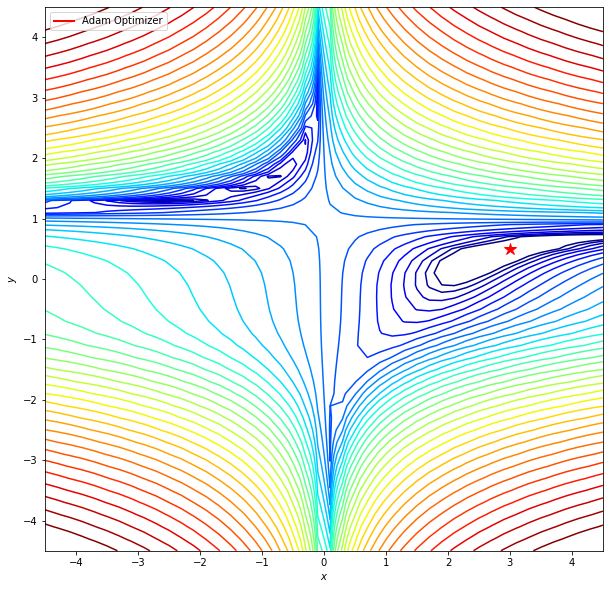

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.plot(*minima_, 'r*', markersize=12)

line, = ax.plot([], [], 'r', label='Adam Optimizer', lw=2)
point, = ax.plot([], [], 'ro')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

ax.legend(loc='upper left')

In [42]:
pip install ffmpeg

  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6086 sha256=3e2439e1e0b4370e6c0f4c74c8b68c0ceceacc09323db25e60322c797ff932b5
  Stored in directory: c:\users\tut\appdata\local\pip\cache\wheels\64\80\6e\caa3e16deb0267c3cbfd36862058a724144e19fdb9eb03af0f
Successfully built ffmpeg
Note: you may need to restart the kernel to use updated packages.


(1)以, Adam, 為例, 調整 batch_size, epoch , 觀察accurancy, loss 的變化

(2)以同一模型, 分別驗證 SGD, Adam, Rmsprop 的 accurancy

In [13]:
from __future__ import print_function
import tensorflow.keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import os
from tensorflow.keras import optimizers

In [16]:
#Blas GEMM launch failed , 避免動態分配GPU / CPU, 出現問題
import tensorflow as tf

In [27]:
gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.333)

sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))

In [28]:

'''
   宣告並設定
   batch_size：對總的樣本數進行分組，每組包含的樣本數量
   epochs ：訓練次數
   
''' 

batch_size = 64
num_classes = 10
epochs = 15
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

In [30]:
# 檢查Dataset 的描述與資訊
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [31]:
#    第一步：選擇模型, 順序模型是多個網絡層的線性堆疊
 
model = Sequential()

#   第二步：構建網絡層
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense( 10)) # 輸出結果是10個類別，所以維度是10   
model.add(Activation('softmax')) # 最後一層用softmax作為激活函數

In [32]:
# 模型建立完成後，統計參數總量
print("Total Parameters：%d" % model.count_params())

Total Parameters：1250858


In [33]:
# 輸出模型摘要資訊
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        1

In [34]:
#第三步編譯
'''
 SGD(隨機梯度下降) - Arguments
lr: float >= 0. Learning rate.
momentum: float >= 0. Parameter that accelerates SGD in the relevant direction and dampens oscillations.
decay: float >= 0. Learning rate decay over each update.
nesterov: boolean. Whether to apply Nesterov momentum.
'''

'''
RMSprop- Arguments
lr: float >= 0. Learning rate.
rho: float >= 0.
epsilon: float >= 0. Fuzz factor. If None, defaults to K.epsilon().
decay: float >= 0. Learning rate decay over each update.
'''


#Example:
opt = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [35]:
# 資料正規化
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [36]:
# 是否要做資料處理
if not data_augmentation:
    print('Not using data augmentation.')
    history=model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    print('')
        
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)
    history=model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)   

'''
   第四步：訓練
   .fit的一些參數
   batch_size：對總的樣本數進行分組，每組包含的樣本數量
   epochs ：訓練次數
   shuffle：是否把數據隨機打亂之後再進行訓練
   validation_split：拿出百分之多少用來做交叉驗證
   verbose：屏顯模式 - 0：不輸出, 1：輸出進度, 2：輸出每次的訓練結果
''' 
    

Using real-time data augmentation.

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 17s 338us/sample - loss: 1.8652 - accuracy: 0.3132 - val_loss: 1.5210 - val_accuracy: 0.4416
Epoch 2/15
50000/50000 [==============================] - 8s 153us/sample - loss: 1.4180 - accuracy: 0.4819 - val_loss: 1.2486 - val_accuracy: 0.5473
Epoch 3/15
50000/50000 [==============================] - 8s 153us/sample - loss: 1.2188 - accuracy: 0.5627 - val_loss: 1.0630 - val_accuracy: 0.6206
Epoch 4/15
50000/50000 [==============================] - 7s 148us/sample - loss: 1.0921 - accuracy: 0.6121 - val_loss: 0.9878 - val_accuracy: 0.6534
Epoch 5/15
50000/50000 [==============================] - 8s 152us/sample - loss: 0.9900 - accuracy: 0.6487 - val_loss: 1.0174 - val_accuracy: 0.6507
Epoch 6/15
50000/50000 [==============================] - 7s 149us/sample - loss: 0.9139 - accuracy: 0.6746 - val_loss: 0.8123 - val_accuracy: 0.7142
Epoch 7/15
50

'\n   第四步：訓練\n   .fit的一些參數\n   batch_size：對總的樣本數進行分組，每組包含的樣本數量\n   epochs ：訓練次數\n   shuffle：是否把數據隨機打亂之後再進行訓練\n   validation_split：拿出百分之多少用來做交叉驗證\n   verbose：屏顯模式 - 0：不輸出, 1：輸出進度, 2：輸出每次的訓練結果\n'

In [37]:
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

#    第六步：輸出
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Saved trained model at C:\Users\tut\PythonTest\saved_models\keras_cifar10_trained_model.h5 
10000/10000 [==============================] - 1s 117us/sample - loss: 0.6866 - accuracy: 0.7685
Test loss: 0.6865678846359253
Test accuracy: 0.7685


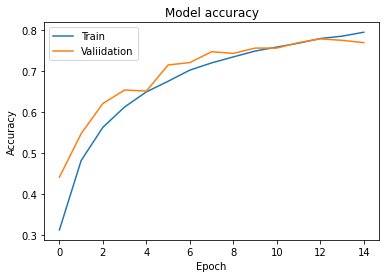

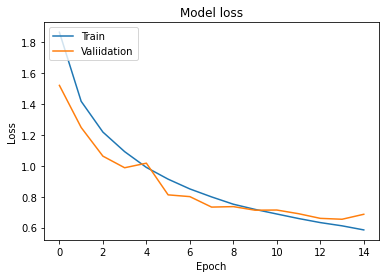

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valiidation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valiidation'], loc='upper left')
plt.show()